In [1]:
import numpy as np
from numpy.linalg import eigvals
import matplotlib.pyplot as plt

from matplotlib import cm
from matplotlib.colors import LogNorm
from matplotlib.animation import FuncAnimation as FA

plt.rc("font", family="serif", size=16)
plt.rc("mathtext", fontset="cm")
plt.rc("lines", lw=2)

In [2]:
D11 = lambda phi, a, x, c:-(
    + 2*(phi[0] - c[0, 0])**2 
    + 2*(phi[0] - c[0, 1])**2 
    + 8*(phi[0] - c[0, 0])*(phi[0] - c[0, 1]) 
    + 2*x[1]*phi[1]**2
    )+0j
D22 = lambda phi, a, x, c: -(
    + 2*(phi[1] - c[1, 0])**2 
    + 2*(phi[1] - c[1, 1])**2 
    + 8*(phi[1] - c[1, 0])*(phi[1] - c[1, 1])
    + 2*x[1]*phi[0]**2
    )+0j
D12 = lambda phi, a, x, c: -((x[0] + a) + 4*x[1]*phi[0]*phi[1])+0j
D21 = lambda phi, a, x, c: -((x[0] - a) + 4*x[1]*phi[0]*phi[1])+0j


def D0(phi, a, x, c):
    D = np.matrix([
        [D11(phi, a, x, c), D12(phi, a, x, c)], 
        [D21(phi, a, x, c), D22(phi, a, x, c)]])
    return D

In [3]:
c = np.matrix([[.2, .5], [.1, .5]])

# c = np.matrix([[.2, .2], [.5, .2]])
x = np.array([-.2, .2])

n = 100
k = 1.
phi1 = np.linspace(-k, k, n)
phi2 = np.linspace(-k, k, n)
p = np.array(np.meshgrid(phi1, phi2))

aa = np.linspace(0, .5, 8)
print('c_11 = {}'.format(c[0, 0]))
print('c_12 = {}'.format(c[0, 1]))
print('c_21 = {}'.format(c[1, 0]))
print('c_22 = {}'.format(c[1, 1]))
print('chi = {}'.format(x[0]))
print('chi\' = {}'.format(x[1]))

c_11 = 0.2
c_12 = 0.5
c_21 = 0.1
c_22 = 0.5
chi = -0.2
chi' = 0.2


a = 0.0


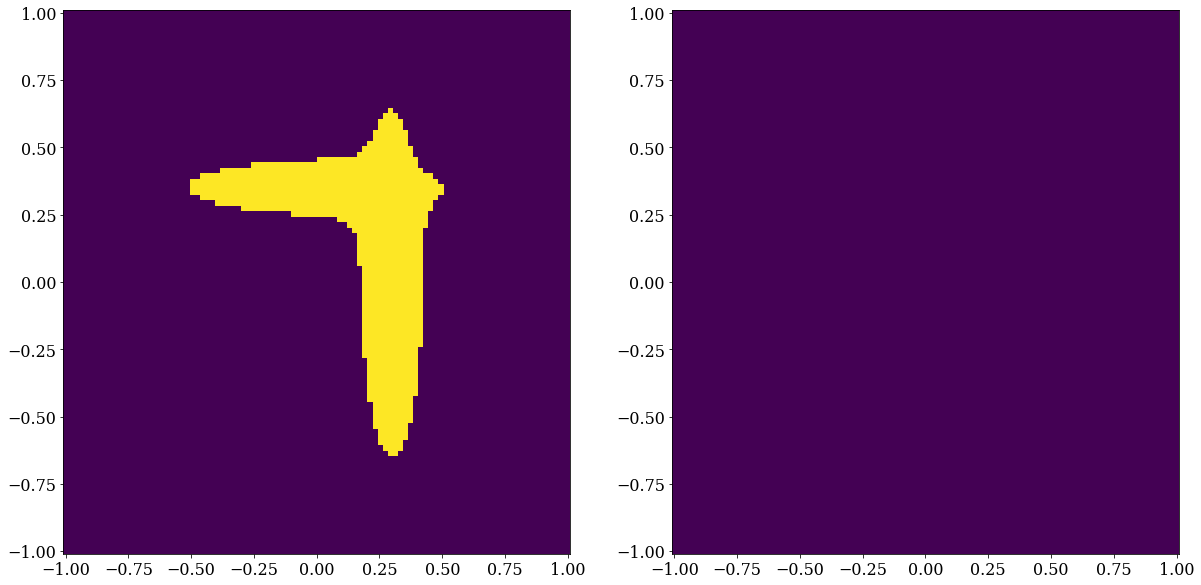

a = 0.07142857142857142


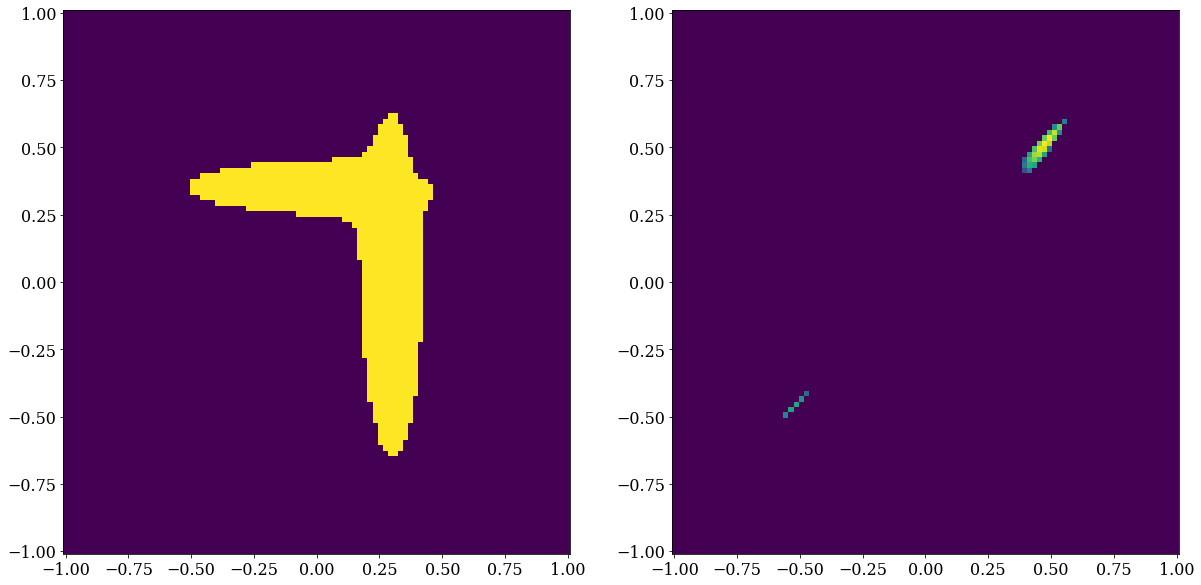

a = 0.14285714285714285


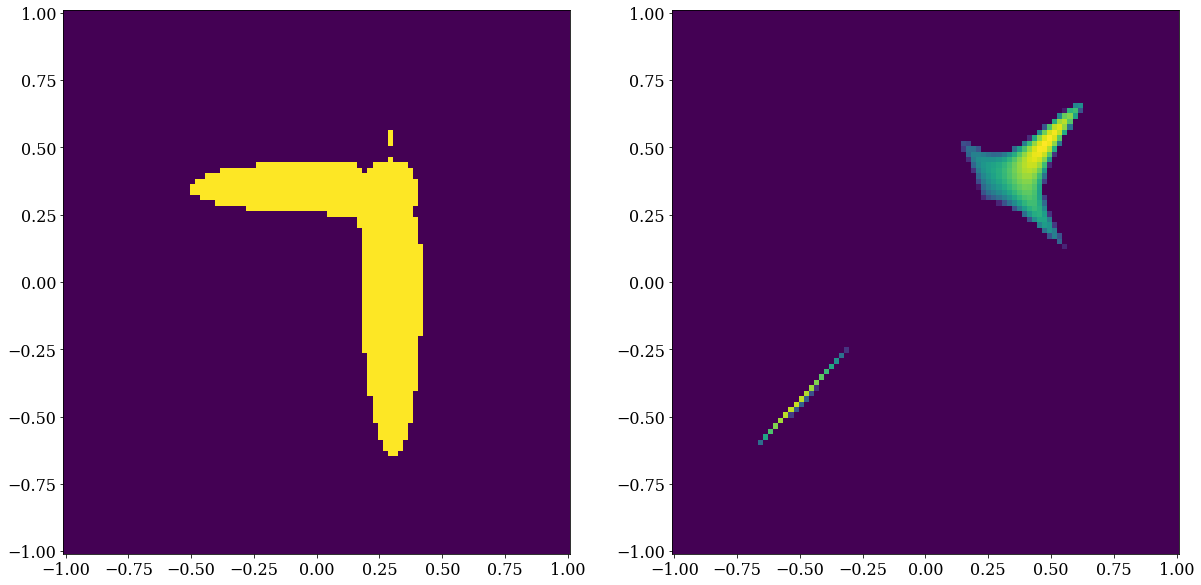

a = 0.21428571428571427


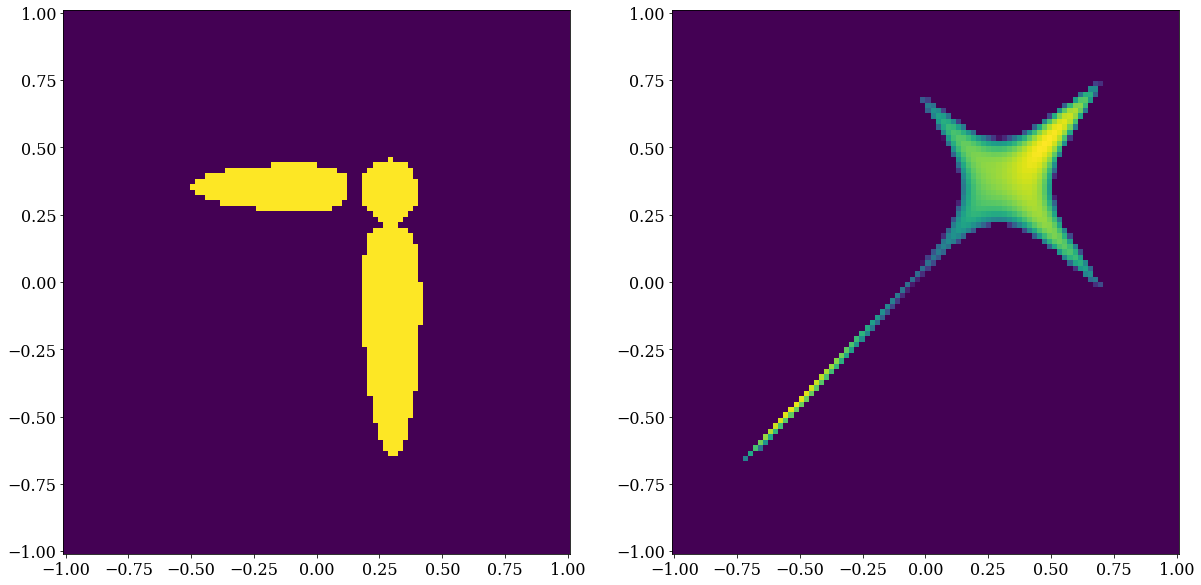

a = 0.2857142857142857


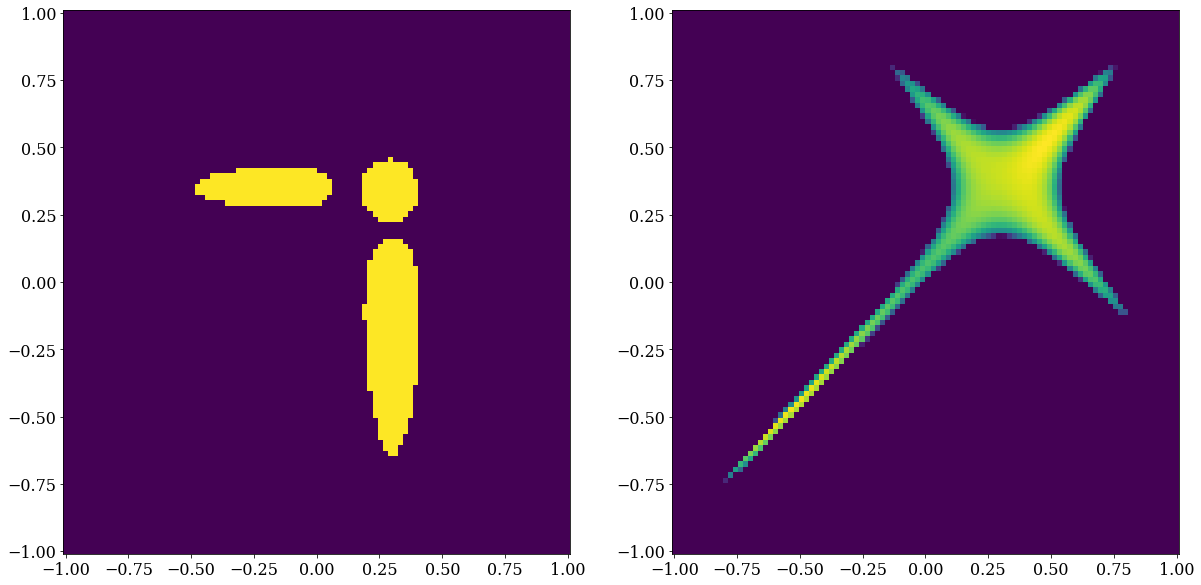

a = 0.3571428571428571


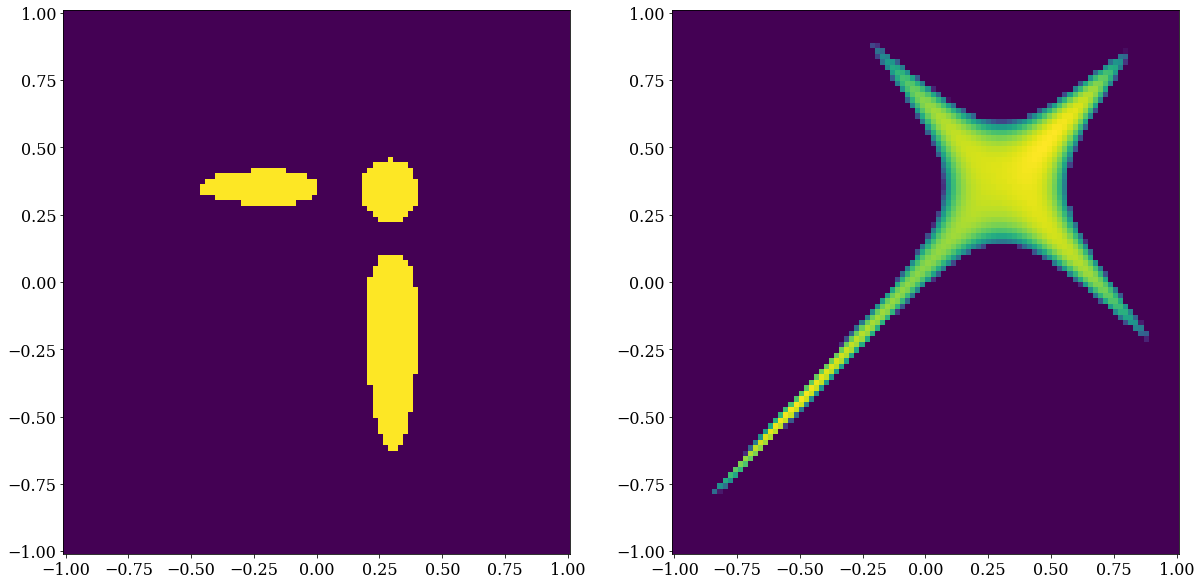

a = 0.42857142857142855


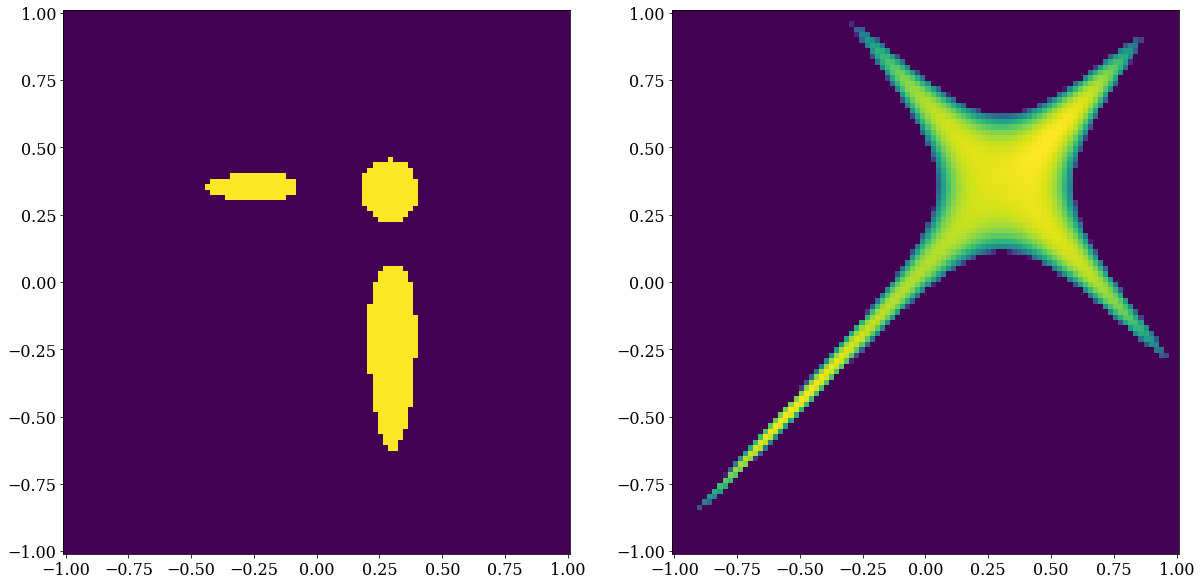

a = 0.5


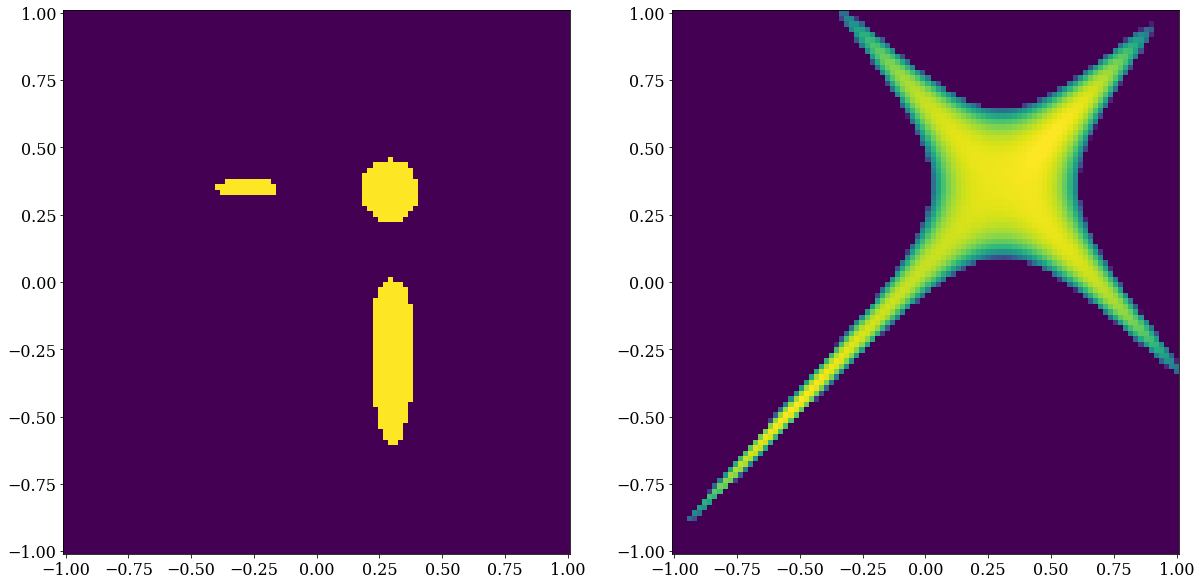

In [4]:

for a in aa:
    fig, ax = plt.subplots(1, 2, figsize=(20, 10))
    D = lambda p: D0(p, a, x, c)
    l = np.array([[eigvals(D(p[:, i, j])) for i in range(n)] for j in range(n)])

    print("a = {}".format(a))
    Cr = np.logical_or(l[:, :, 0].real>0, l[:, :, 1].real>0)
    Ci = l[:, :, 0].imag 
    # Cr = np.logical_and(Cr, np.logical_not(Ci))
    ax[0].pcolormesh(p[0], p[1], Cr)
    ax[1].pcolormesh(p[0], p[1], Ci)

    plt.show()


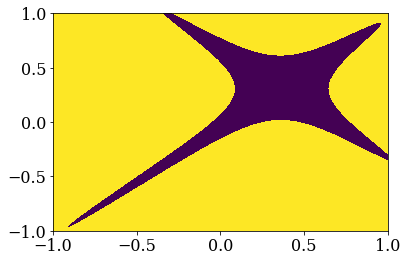

In [5]:
n = 2000
k = 1.
phi1 = np.linspace(-k, k, n)
phi2 = np.linspace(-k, k, n)
p = np.array(np.meshgrid(phi1, phi2))

a = .5
Ci = lambda phi : ((D11(phi, a, x, c) - D22(phi, a, x, c))**2 + 4*D12(phi, a, x, c)*D21 (phi, a, x, c) )>0


plt.pcolormesh(p[0], p[1], Ci(p))

In [6]:
l1 = lambda phi, a : ( (D11(phi, a, x, c) + D22(phi, a, x, c)) + np.sqrt((D11(phi, a, x, c) - D22(phi, a, x, c))**2 + 4*D12(phi, a, x, c)*D21 (phi, a, x, c) ) ) /2
l2 = lambda phi, a : ( (D11(phi, a, x, c) + D22(phi, a, x, c)) + np.sqrt((D11(phi, a, x, c) - D22(phi, a, x, c))**2 + 4*D12(phi, a, x, c)*D21 (phi, a, x, c) ) ) /2

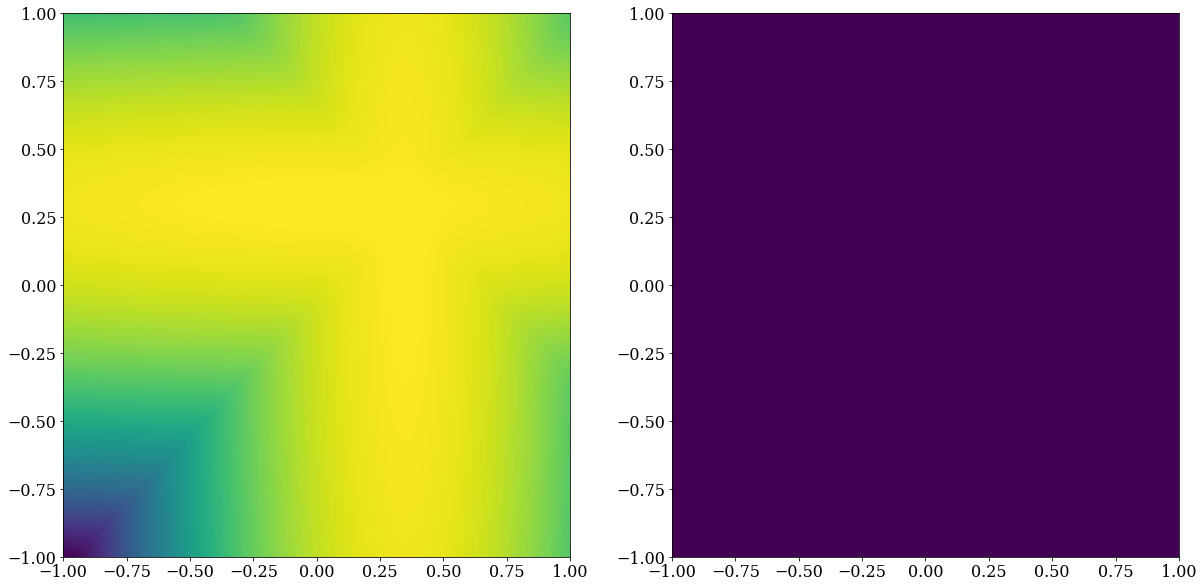

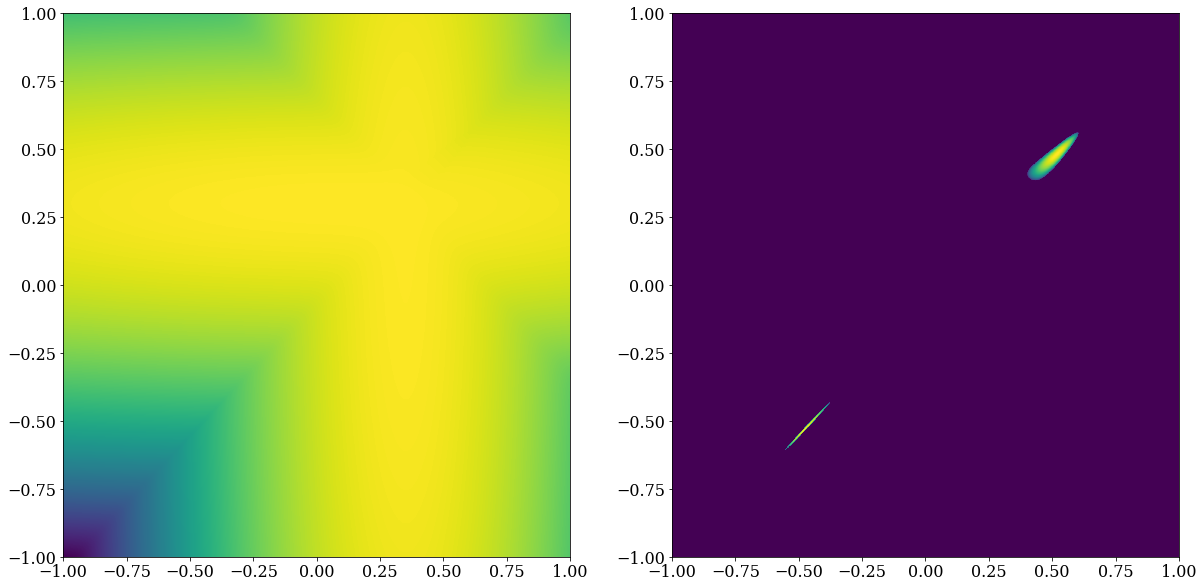

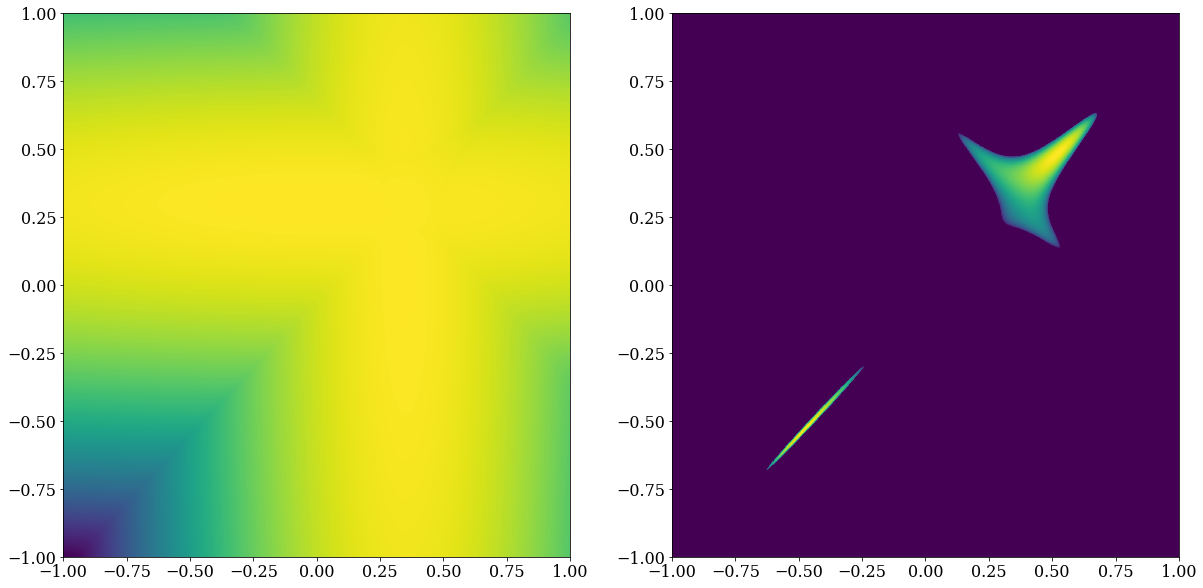

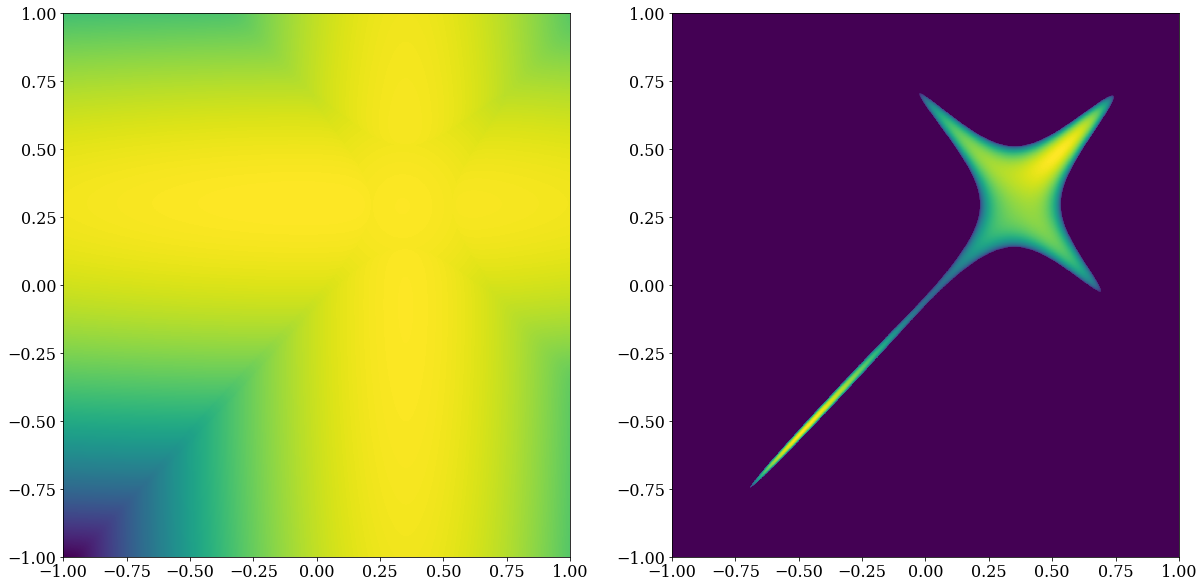

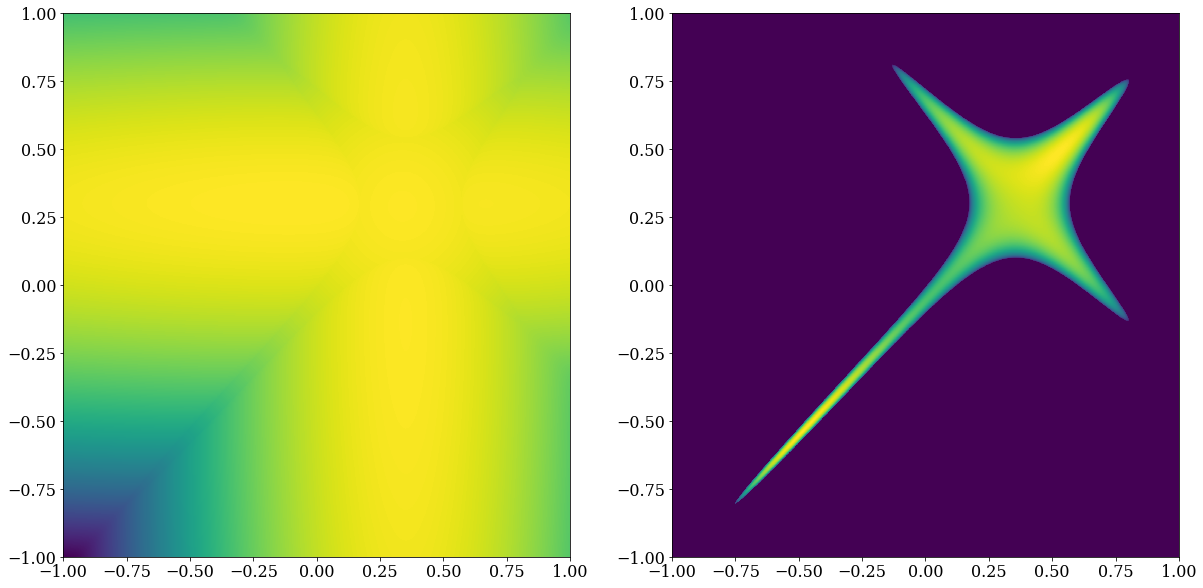

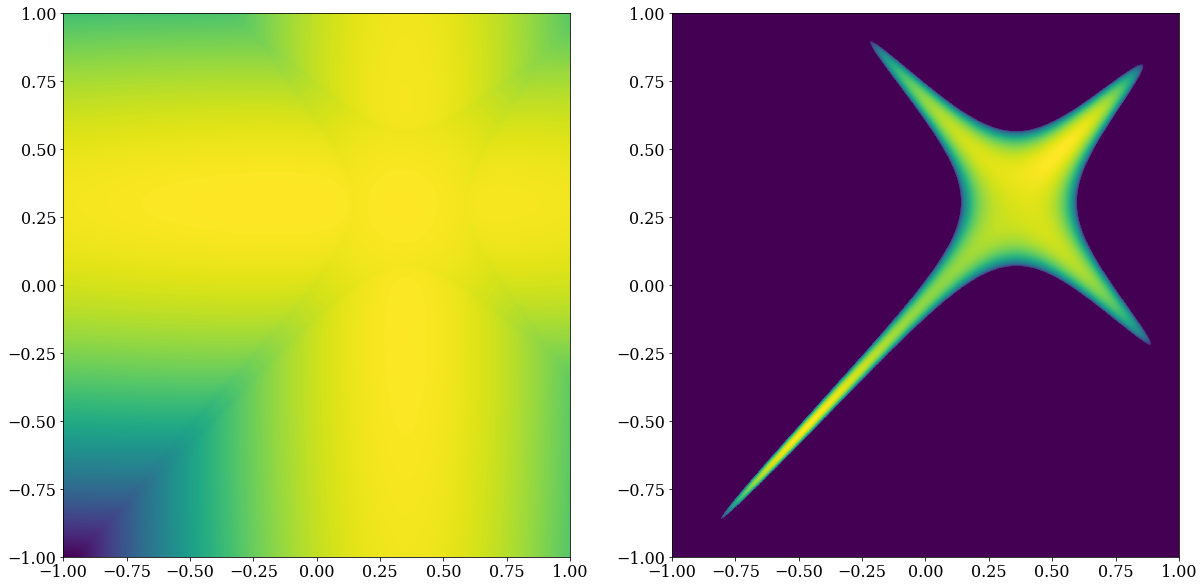

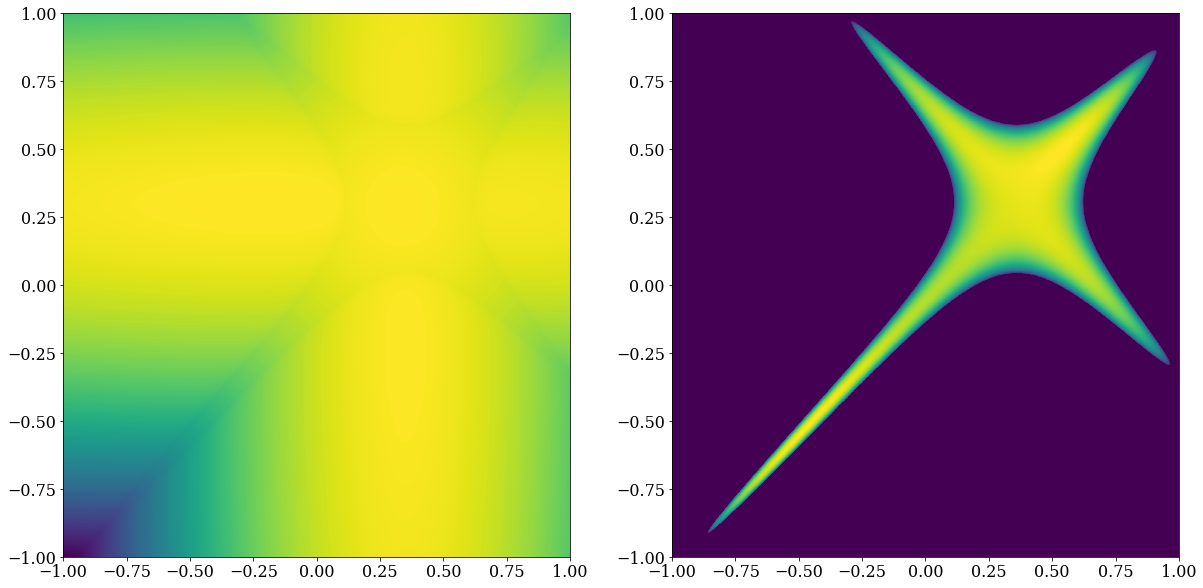

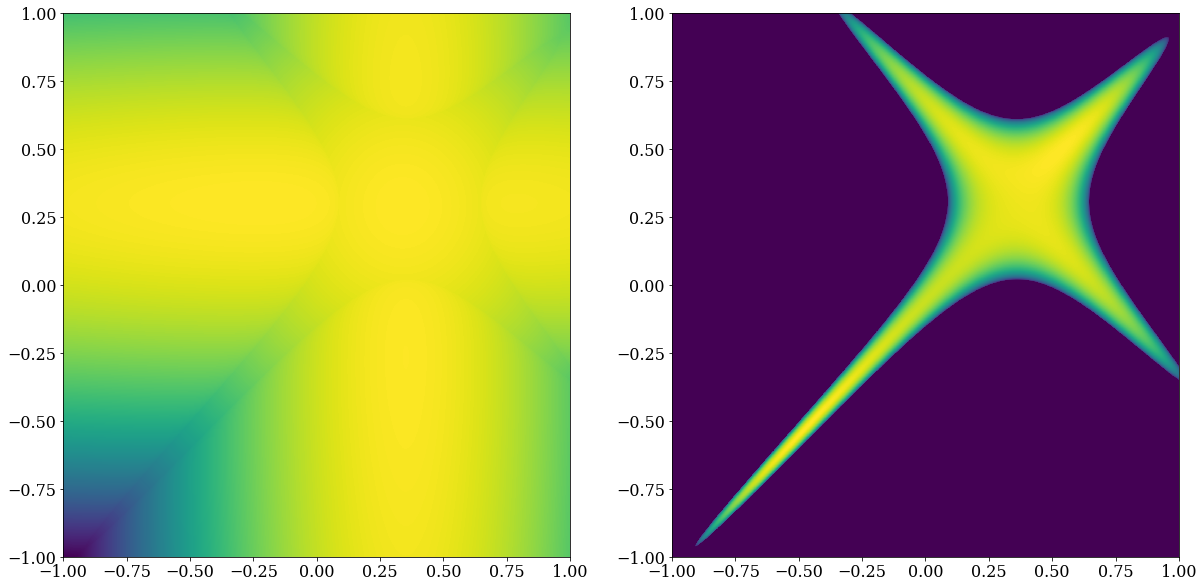

In [7]:
for a in aa:
    fig, ax = plt.subplots(1, 2, figsize=(20, 10))

    ax[0].pcolormesh(p[0], p[1], l1(p, a).real)
    ax[1].pcolormesh(p[0], p[1], l1(p, a).imag)

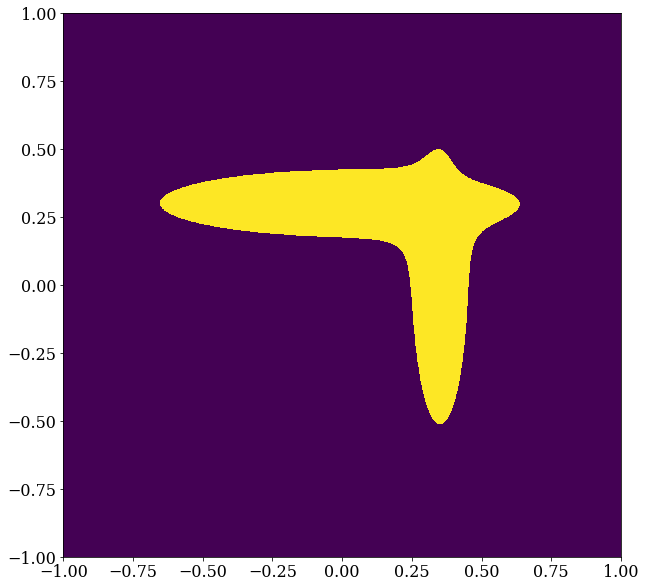

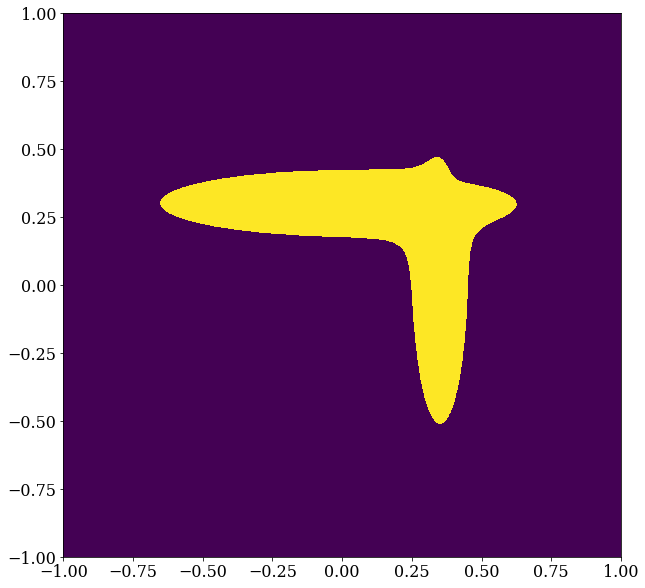

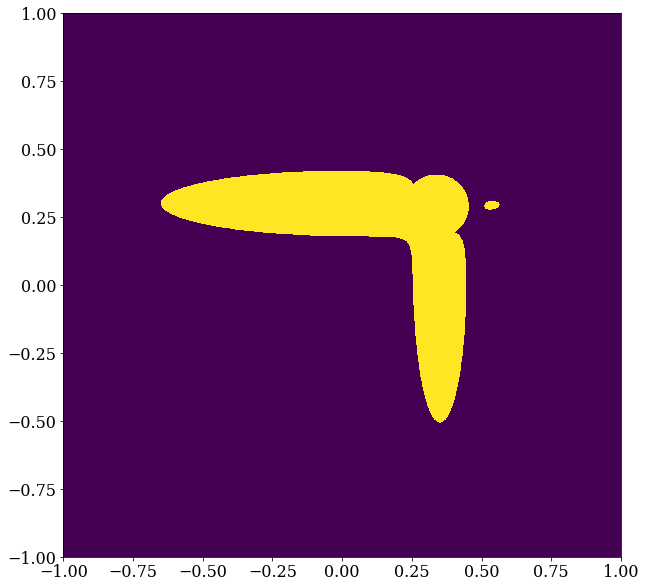

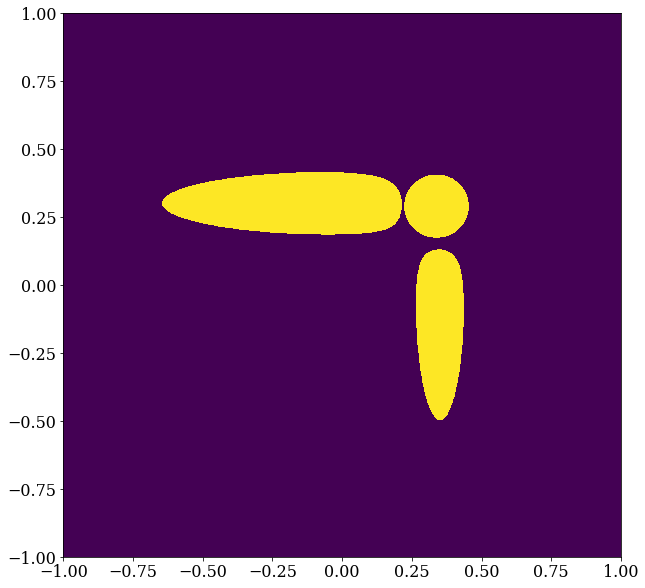

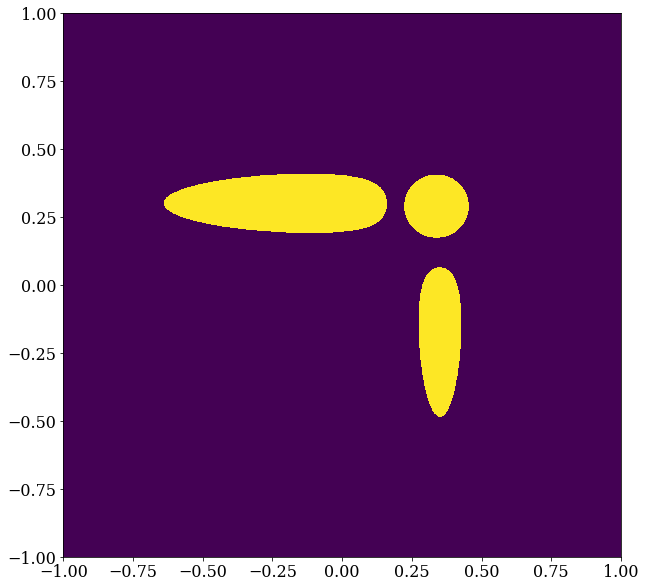

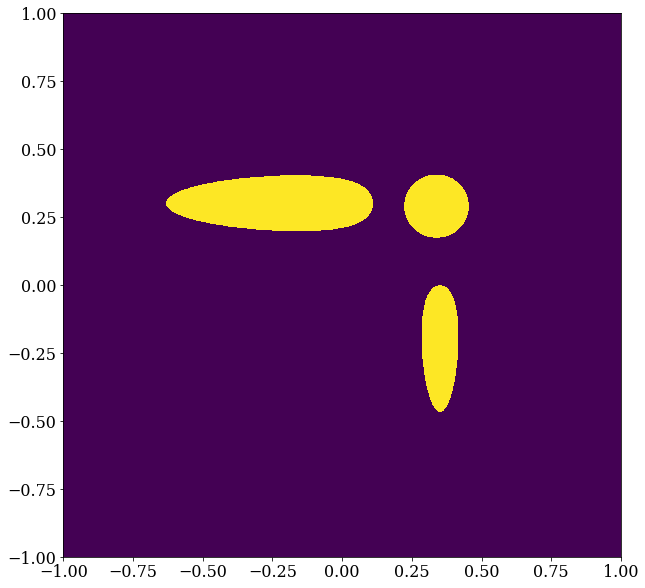

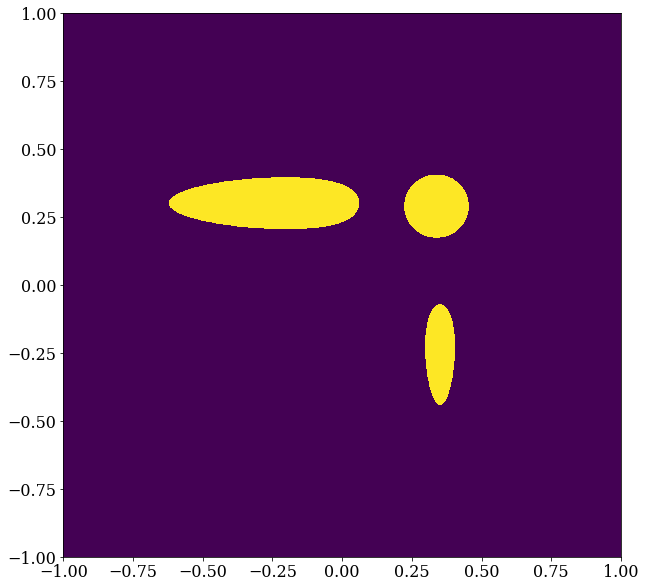

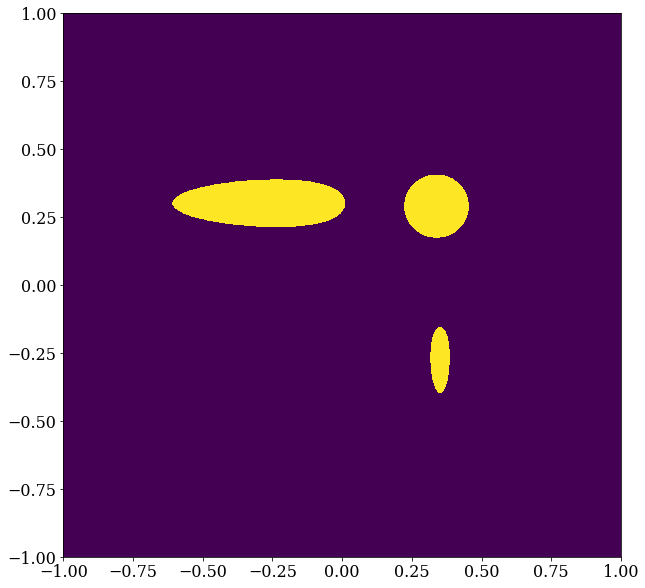

In [8]:
for a in aa:
    fig, ax = plt.subplots( figsize=(10, 10))

    ax.pcolormesh(p[0], p[1], l1(p, a).real>0)